In [1]:
import deBruijn as db
import genData as gd
import numpy as np

# De Bruijn graph verification

In [7]:
a=gd.Gendata(Z=0) # generate data
print(a.seq)
b=db.DeBruijn(a.kmers) # initialize, get all edges
b.FindEndpoint() 
b.FindEulerianPath()
print(b.seq)
print(a.checkmatch(b.seq)) #check if sequences match

AGGGGTTTGGAATTGGGTCGTAGAGGCTGACAAGGCCAACTGAGCCAATAATTCTCCTCAGAGGAGCGTGAGCCCCACCTGTTTCATATATTTATCCAACATGTACAATTACTGTCACGAGTTATTTTCGCCTCACGCGTGGTCCTTTGGTAGGAGCTCTGTGCGGGGATCCCGCATGAGGGGGCACATTTAACAGAACGACTTGAAGGGCTCTATGCCAATGATCGACATAACCAATGCAGTTACGAAGAACGTCCCGGTTGTTGCGGCACGATGCGCGGACCAATACATCACCGACACGTTACGAGAGCCCCATTGCGTCGTATGATAGGATGAAGCCGAGTCGAAGTATCCGGATCGGGGAGCTTAAACTACCCTTGGCGTAGTTGGAGTGAAATAATTACGAGACCGATCAGGAATAACTCTGAATACGAAAATATCTTCTGAGGCCTCTGTATTTAGGGGTGCTATGAAAGATAGATCTGATCCCCCTATCAATGTGTTGAATGGACTTGGCCGCGGGCCATTTGAAACTGCATAGGTATTTAAGGGAGAGTAGACATCTACCCTGTGAGTAGAAGGCCCTAAAGCCAGCAATTGATGAGTCTGGCTAGTAGCTACAAATAGGGAAGCTTGGCACGGTATTCAATCCCGGTATGCCCGCAGAGTGGATCTCCCTAAGTCGACACGTTTGCGCTGTGATGTTTCCGTGAGCATCCTCGAACCTTGCTTTGTCTTCATTAAAAGCCGATTCCTTTAGGTCTAGTGTATTGGACGGAGGCAAGATCGCGTAGGCGAACTCAGAGTTTAGGGGCGGCGGAAACATGGTCTTTACCCCAAAATCTGTGGTTTTGCACCGCGTAACGCGCGCCAGGTCATCCGATGCGTCCATACCCATTATCTGCTCCTATGTGAGGAATTTTAGAACGTTTCAACAACTACCAAAGCGGTAATCCTCCCCCCCTAAGTAATACTTAGCAATTCCCCCCAAAGAAGGGTC

Note, small percentage that this does not match while using default parameters

## Simulation codes

In [8]:
## Varying X effect on recreating original genome

def checkmatch(X,L,Y,Z,rep=50):
  ## I am regenerating sequence for each iteration
  ## Since numerical unstability of # of walks at threshold parameters
  result=[]
  x=0
  i=0
  while i<rep:
    a=gd.Gendata(K=X,X=L,Y=Y,Z=Z) 
    b=db.DeBruijn(a.kmers)  
    b.FindEndpoint()
    x+=1/(b.CCycle()) ## BEST theorem implementation
    b.FindEulerianPath() ## de Bruijn graph implementation
    result.append(a.checkmatch(b.seq))
    i+=1
  return (sum(result)/(rep)*100,x/rep*100)


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Results

## Varying read length, no repeats

In [9]:
##### varying X the read length, no repeats #############
result_baseline=[]
result_ccycle1=[]
rg=range(5,20)
for x in rg:
  rw,ne=checkmatch(x,1000,20,0)
  result_baseline.append(rw)
  result_ccycle1.append(ne)

Text(2, 120, 'a.')

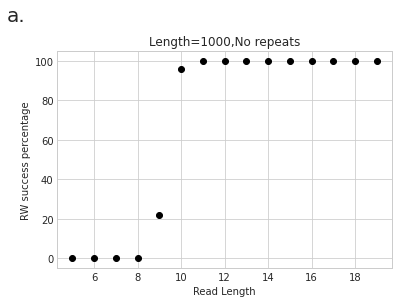

In [12]:
rg=range(5,20)
plt.plot(rg, result_baseline, 'o', color='black');
# plt.plot(rg, result_ccycle,'o',fillstyle="none",color='red');
plt.title("Length=1000,No repeats")
plt.xlabel("Read Length")
plt.ylabel("RW success percentage");
t = ("a.")
plt.text(2, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

Text(2, 120, 'a.')

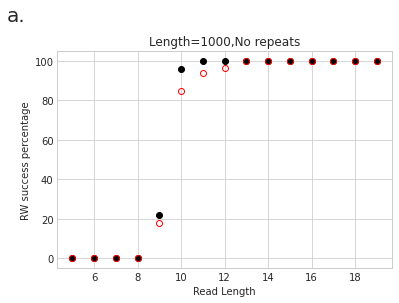

In [13]:
rg=range(5,20)
plt.plot(rg, result_baseline, 'o', color='black');
plt.plot(rg, result_ccycle1,'o',fillstyle="none",color='red');
plt.title("Length=1000,No repeats")
plt.xlabel("Read Length")
plt.ylabel("RW success percentage");
t = ("a.")
plt.text(2, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

## Varying read length, with repeats

In [41]:
#### Let default repeat=length20, repeat 15 times
## Vary the read length
rg=range(20,30)
result_xvary=[]
result_ccycle2=[]
for x in rg:
  rw,ne=checkmatch(x,1000,20,15)
  result_xvary.append(rw)
  result_ccycle2.append(ne)


Text(18, 120, 'b.')

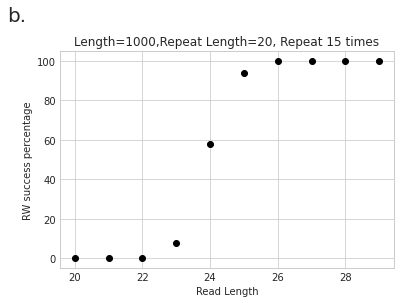

In [38]:
rg=range(20,30)
plt.plot(rg, result_xvary, 'o', color='black');
# plt.plot(rg, result_ccycle,'o',fillstyle="none",color='red');
plt.title("Length=1000,Repeat Length=20, Repeat 15 times")
plt.xlabel("Read Length")
plt.ylabel("RW success percentage");
t = ("b.")
plt.text(18, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

Text(18, 120, 'b.')

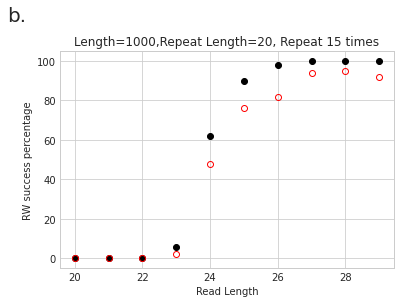

In [56]:
rg=range(20,30)
plt.plot(rg, result_xvary, 'o', color='black');
plt.plot(rg, result_ccycle,'o',fillstyle="none",color='red');
plt.title("Length=1000,Repeat Length=20, Repeat 15 times")
plt.xlabel("Read Length")
plt.ylabel("RW success percentage");
t = ("b.")
plt.text(18, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

## Vary repeat length

In [47]:
result_yvary=[]
result_ccycle3=[]
rg=range(5,30)
for y in rg:
  rw,ne=checkmatch(20,1000,y,15)
  result_yvary.append(rw)
  result_ccycle3.append(ne)


Text(0, 120, 'c.')

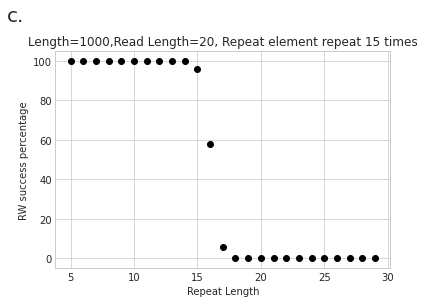

In [49]:
rg=range(5,30)
plt.plot(rg, result_yvary, 'o', color='black');
plt.title("Length=1000,Read Length=20, Repeat element repeat 15 times")
plt.xlabel("Repeat Length")
plt.ylabel("RW success percentage");
t = ("c.")
plt.text(0, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

Text(0, 120, 'c.')

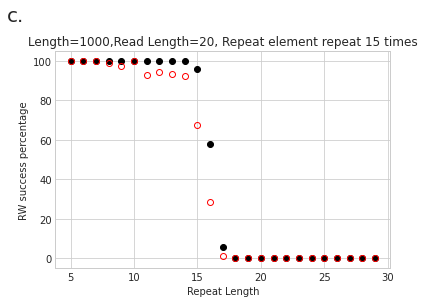

In [55]:
rg=range(5,30)
plt.plot(rg, result_yvary, 'o', color='black');
plt.plot(rg, result_ccycle3,'o',fillstyle="none",color='red');
plt.title("Length=1000,Read Length=20, Repeat element repeat 15 times")
plt.xlabel("Repeat Length")
plt.ylabel("RW success percentage");
t = ("c.")
plt.text(0, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

## Vary repeat frequency

In [51]:
result_zvary=[]
result_ccycle4=[]
rg=range(5,40)
for z in rg:
  rw,ne=checkmatch(20,1000,15,z)
  result_zvary.append(rw)
  result_ccycle4.append(ne)


Text(0, 120, 'd.')

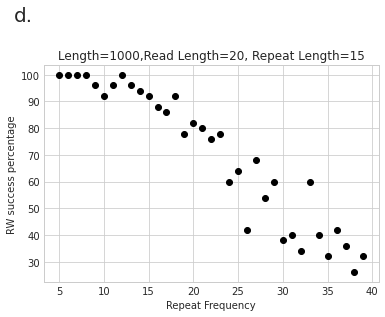

In [53]:
plt.plot(rg, result_zvary, 'o', color='black');
plt.title("Length=1000,Read Length=20, Repeat Length=15")
plt.xlabel("Repeat Frequency")
plt.ylabel("RW success percentage");
t = ("d.")
plt.text(0, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)

Text(0, 120, 'd.')

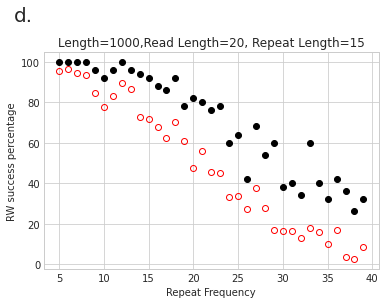

In [54]:
rg=range(5,40)
plt.plot(rg, result_zvary, 'o', color='black');
plt.plot(rg, result_ccycle4,'o',fillstyle="none",color='red');
plt.title("Length=1000,Read Length=20, Repeat Length=15")
plt.xlabel("Repeat Frequency")
plt.ylabel("RW success percentage");
t = ("d.")
plt.text(0, 120, t, ha='left', rotation=0, wrap=True,fontsize=20)